In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

diabet = pd.read_excel('diabet.xlsx')
diabet = diabet.dropna(how='any')
diabet['Вага'] = round(diabet['Вага']/2.205, 2) # pound in kg
diabet['Талія (дюйм)'] = round(diabet['Талія (дюйм)']*2.54, 2) # inches in cm
diabet['Стегна (дюйми)'] = round(diabet['Стегна (дюйми)']*2.54) # inches in cm
diabet.rename(columns = {'Талія (дюйм)' : 'Талія', 'Стегна (дюйми)' : 'Стегна'}, inplace=1)

df = diabet.drop(['№','Уровень холестерина','Стабілізована глюкоза','Ліпопротеїни','Співвідношення холестерину до ліпопротеїну','Гемоглобін','Вік','Зріст','Систолічний тиск','Діастолічний тиск','Протромбіновий час'], axis=1)
def text_coding(data, column_to_change):
    data[column_to_change], uniques = pd.factorize(data[column_to_change])
text_coding(df, 'Стать')

diabet['Талія, Стегна, Вага'] = diabet[['Талія', 'Стегна', 'Вага']].apply(lambda x: [x[x.notnull()]], axis=1)
diabet['Талія, Стегна, Вага'] = [item.tolist() for sublist in diabet['Талія, Стегна, Вага'] for item in sublist]

df

,Стать,Вага,Талія,Стегна
0,0,54.88,73.66,97.0
1,0,98.87,116.84,122.0
2,0,116.10,124.46,145.0
3,1,53.97,83.82,97.0
4,1,82.99,111.76,104.0
...,...,...,...,...
397,0,52.15,78.74,104.0
398,1,78.46,88.90,99.0
399,0,69.84,81.28,109.0
400,0,75.74,83.82,102.0


In [158]:
'''
Been used standart function for distance computations from SciPy'''
def dots_distance(a, b, method):
    return cdist(a, b, method)
    
dots_distance(np.array([diabet['Талія, Стегна, Вага'][0]]), np.array([diabet['Талія, Стегна, Вага'][1]]), 'cityblock')

array([[112.17]])

In [142]:
'''
Elbow method measures the within sum of error in each cluster
As the number of clusters increasings this error decrease'''
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df)
    distortions.append(sum(np.min(dots_distance(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / df.shape[0])

distortions

[22.876196480785275,
 16.03660038159861,
 12.753179816471178,
 11.236415767816295,
 10.110097330815625,
 9.55803084095667,
 9.048460893523977,
 8.643750232902216,
 8.402724751614215]

Text(0.5, 1.0, 'The Elbow Method showing the optimal k')

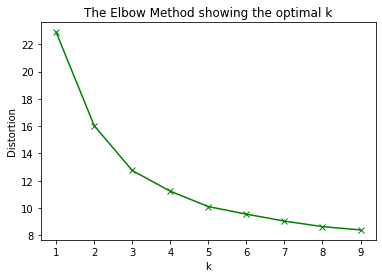

In [143]:
plt.plot(K, distortions, 'gx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')

The graph indicates that 3 clusters are sufficient for this dataset. We can now perform the actual kmeans clustering.

In [173]:
km = KMeans(3, init='k-means++', random_state=3425)
km.fit(df.values)

df['predict'] = km.predict(df.values)
df[:10]

,Стать,Вага,Талія,Стегна,predict
0,0,54.88,73.66,97.0,1
1,0,98.87,116.84,122.0,0
2,0,116.10,124.46,145.0,0
3,1,53.97,83.82,97.0,1
4,1,82.99,111.76,104.0,2
5,1,86.17,91.44,107.0,2
6,1,86.62,116.84,124.0,2
8,1,75.28,86.36,102.0,1
9,0,91.61,114.30,127.0,0
10,0,70.75,99.06,114.0,2


Descriptive statistics for the three clusters that were produced for the variable in the dataset

In [174]:
df.groupby('predict').Вага.mean()

predict
0    110.830317
1     64.486966
2     83.359701
Name: Вага, dtype: float64

In [175]:
df.groupby('predict').Талія.mean()

predict
0    118.331746
1     82.926621
2     99.835689
Name: Талія, dtype: float64

In [176]:
df.groupby('predict').Стегна.mean()

predict
0    132.317460
1     97.510345
2    111.239521
Name: Стегна, dtype: float64

In [177]:
print(pd.crosstab(df['predict'], df['Стать']))

Стать     0   1
predict        
0        43  20
1        83  62
2        94  73


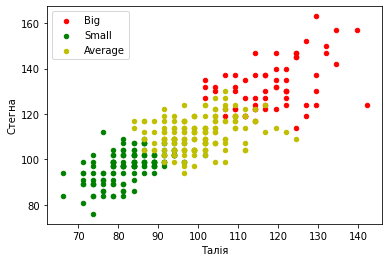

In [178]:
clust_map = {0:'Big', 1:'Small', 2:'Average'} # , 3:'Editional_1', 4:'Editional_2'
df['perf'] = df.predict.map(clust_map)
d_color = {'Big':'r', 'Small':'g', 'Average':'y'} # , 'Editional_1':'b', 'Editional_2':'c'"""

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.perf == clust].plot(kind='scatter',x='Талія',y='Стегна',label=clust,ax=ax,color=color)

4 clusters:

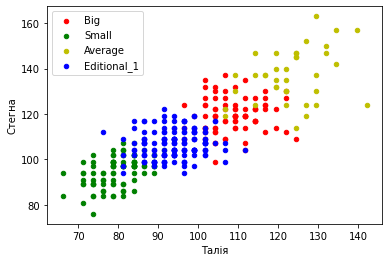

In [159]:
km = KMeans(4, init='k-means++', random_state=3425)
km.fit(df.values)

df['predict_4'] = km.predict(df.values)

clust_map = {0:'Big', 1:'Small', 2:'Average', 3:'Editional_1'} # , 4:'Editional_2'
df['perf'] = df.predict_4.map(clust_map)
d_color = {'Big':'r', 'Small':'g', 'Average':'y', 'Editional_1':'b'} # , 'Editional_2':'c'

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.perf == clust].plot(kind='scatter',x='Талія',y='Стегна',label=clust,ax=ax,color=color)

5 clusters:

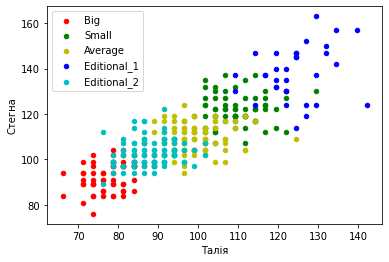

In [162]:
km = KMeans(5, init='k-means++', random_state=3425)
km.fit(df.values)

df['predict_5'] = km.predict(df.values)

clust_map = {0:'Big', 1:'Small', 2:'Average', 3:'Editional_1', 4:'Editional_2'}
df['perf'] = df.predict_5.map(clust_map)
d_color = {'Big':'r', 'Small':'g', 'Average':'y', 'Editional_1':'b', 'Editional_2':'c'}

fig, ax = plt.subplots()
for clust in clust_map.values():
    color = d_color[clust]
    df[df.perf == clust].plot(kind='scatter',x='Талія',y='Стегна',label=clust,ax=ax,color=color)

K-means - это форма бесконтрольного обучения, в которой нет зависимой переменной, которую можно использовать для оценки точности классификации или уменьшения ошибок в регрессии. Таким образом, порой трудно узнать, насколько хорошо алгоритм справился с данными. Несмотря на это, k-means обычно используются в ситуациях, когда иследователь пытается понять данные, а не предсказать их.

В данном случае при увеличении количества кластеров не происходит уменьшения разброса данных, а скорее наоборот. Для улучшения результата следует почистить входные данные.

Даже при таких неточностях можно заметить, что данные распределены очень неплохо. На средних значениях по столбцах видно что кластеризация разделила данные на 3 категории. На людей с большими объемами, на людей с самыми низкими показателями тела и на 'средних'. Так же можно отметить, что вес у мужчин прослеживается больше, что еще раз подтверждает правильность полученных данных.